<a href="https://colab.research.google.com/github/asgharlaib/Project_v1/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
full_df = pd.read_csv("/content/drive/MyDrive/CC_LCL-FullData.csv")
full_df.head(n=10)

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0
5,MAC000002,Std,2012-10-12 03:00:00.0000000,0
6,MAC000002,Std,2012-10-12 03:30:00.0000000,0
7,MAC000002,Std,2012-10-12 04:00:00.0000000,0
8,MAC000002,Std,2012-10-12 04:30:00.0000000,0
9,MAC000002,Std,2012-10-12 05:00:00.0000000,0


In [5]:
full_df_copy = full_df.copy()

In [6]:
print(f"full_df columns datatypes: {full_df.dtypes} \n")

full_df columns datatypes: LCLid                      object
stdorToU                   object
DateTime                   object
KWH/hh (per half hour)     object
dtype: object 



In [7]:
full_df['DateTime'] = pd.to_datetime(full_df['DateTime'])

print(f"full_df columns datatypes: {full_df.dtypes} \n")

full_df columns datatypes: LCLid                              object
stdorToU                           object
DateTime                   datetime64[ns]
KWH/hh (per half hour)             object
dtype: object 



In [8]:
df_8am = full_df[full_df['DateTime'].dt.time == pd.to_datetime('08:00').time()]
print(df_8am.head)


<bound method NDFrame.head of                LCLid stdorToU            DateTime KWH/hh (per half hour) 
15         MAC000002      Std 2012-10-12 08:00:00                      0 
62         MAC000002      Std 2012-10-13 08:00:00                  0.146 
110        MAC000002      Std 2012-10-14 08:00:00                   0.13 
158        MAC000002      Std 2012-10-15 08:00:00                   0.12 
206        MAC000002      Std 2012-10-16 08:00:00                  0.144 
...              ...      ...                 ...                     ...
167932203  MAC005564      ToU 2014-02-23 08:00:00                  0.065 
167932251  MAC005564      ToU 2014-02-24 08:00:00                  0.042 
167932299  MAC005564      ToU 2014-02-25 08:00:00                  0.039 
167932347  MAC005564      ToU 2014-02-26 08:00:00                  0.074 
167932395  MAC005564      ToU 2014-02-27 08:00:00                  0.026 

[3493360 rows x 4 columns]>


In [9]:
##Descriptive Analysis
#Dataframe column names
print(f"Column names: {list(df_8am.columns)} \n")

#Dataframe shape
print(f"df_8am shape: {df_8am.shape} \n")

#Dataframe datatypes
print(f"df_8am columns datatypes: {df_8am.dtypes} \n")

#Looking for missing values
print(f"missing values: {df_8am.isnull().sum()} \n")

Column names: ['LCLid', 'stdorToU', 'DateTime', 'KWH/hh (per half hour) '] 

df_8am shape: (3493360, 4) 

df_8am columns datatypes: LCLid                              object
stdorToU                           object
DateTime                   datetime64[ns]
KWH/hh (per half hour)             object
dtype: object 

missing values: LCLid                      0
stdorToU                   0
DateTime                   0
KWH/hh (per half hour)     0
dtype: int64 



In [10]:
##Descriptive Statistics
df_8am.describe()

,DateTime
count,3493360
mean,2013-03-28 07:12:10.717475328
min,2011-11-24 08:00:00
25%,2012-10-22 08:00:00
50%,2013-03-30 08:00:00
75%,2013-09-10 08:00:00
max,2014-02-27 08:00:00


Text(0.5, 1.0, 'Standard vs Dynamic Time of Use Distribution')

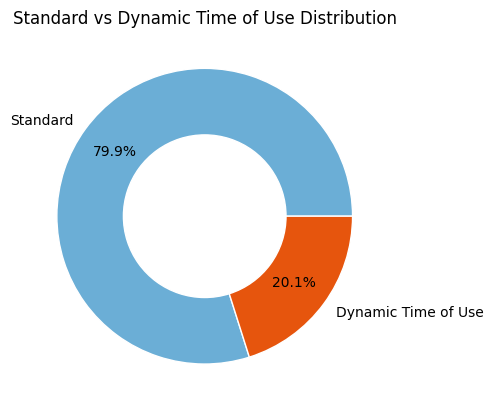

In [11]:
# EDA: Pie chart:
fig, ax = plt.subplots()
cmap = plt.colormaps["tab20c"]
outer_colors = cmap([1,4])
inner_colors = cmap([7,8,7,8])
size = 0.45
pctdist = 0.75

# Counts of households in std or ToU pricing Scheme
total_number = df_8am['stdorToU'].value_counts()

# Pie Chart to show distribution
ax.pie(
    np.array(total_number),
    autopct='%1.1f%%',
    pctdistance = pctdist,
    radius=1.0,
    colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Standard','Dynamic Time of Use']
);
plt.title("Standard vs Dynamic Time of Use Distribution")


In [12]:
df_8am_2014 = df_8am[(df_8am['DateTime'].dt.year == 2014)]
df_8am_2014_copy = df_8am_2014.copy()

In [13]:
# Convert the 'DateTime' column to datetime type
df_8am['DateTime'] = pd.to_datetime(df_8am['DateTime'])

# Extract the date and time into separate columns
df_8am['Date'] = df_8am['DateTime'].dt.date
df_8am['Time'] = df_8am['DateTime'].dt.time

# Display the first few rows to verify
print(df_8am.head())

<ipython-input-13-d74e9ec30bb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8am['DateTime'] = pd.to_datetime(df_8am['DateTime'])
<ipython-input-13-d74e9ec30bb5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8am['Date'] = df_8am['DateTime'].dt.date


         LCLid stdorToU            DateTime KWH/hh (per half hour)   \
15   MAC000002      Std 2012-10-12 08:00:00                      0    
62   MAC000002      Std 2012-10-13 08:00:00                  0.146    
110  MAC000002      Std 2012-10-14 08:00:00                   0.13    
158  MAC000002      Std 2012-10-15 08:00:00                   0.12    
206  MAC000002      Std 2012-10-16 08:00:00                  0.144    

           Date      Time  
15   2012-10-12  08:00:00  
62   2012-10-13  08:00:00  
110  2012-10-14  08:00:00  
158  2012-10-15  08:00:00  
206  2012-10-16  08:00:00  


<ipython-input-13-d74e9ec30bb5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8am['Time'] = df_8am['DateTime'].dt.time


                         LCLid stdorToU KWH/hh (per half hour)         Date  \
DateTime                                                                      
2012-10-12 08:00:00  MAC000002      Std                      0   2012-10-12   
2012-10-13 08:00:00  MAC000002      Std                  0.146   2012-10-13   
2012-10-14 08:00:00  MAC000002      Std                   0.13   2012-10-14   
2012-10-15 08:00:00  MAC000002      Std                   0.12   2012-10-15   
2012-10-16 08:00:00  MAC000002      Std                  0.144   2012-10-16   

                         Time  
DateTime                       
2012-10-12 08:00:00  08:00:00  
2012-10-13 08:00:00  08:00:00  
2012-10-14 08:00:00  08:00:00  
2012-10-15 08:00:00  08:00:00  
2012-10-16 08:00:00  08:00:00  


<ipython-input-19-c742b164fbed>:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


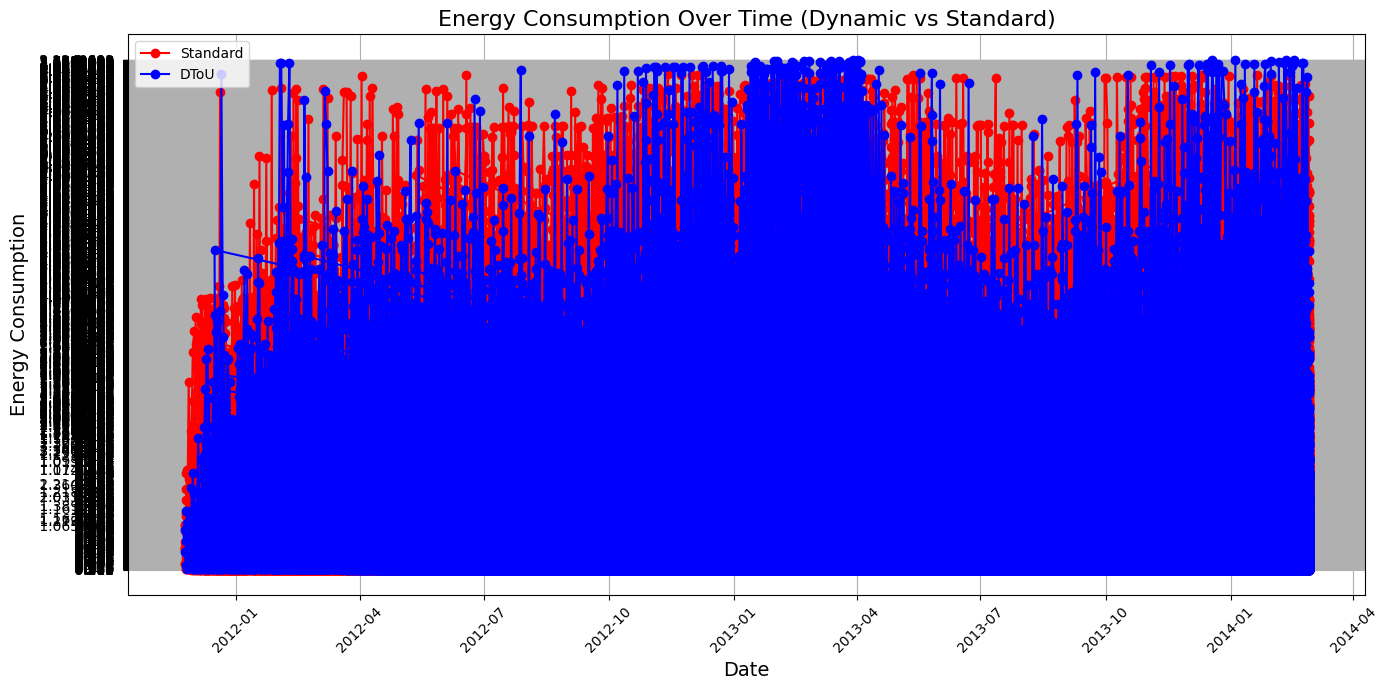

In [19]:
# Filter for dynamic and standard pricing
df_dynamic = df_8am[df_8am['stdorToU'] == 'ToU']
df_standard = df_8am[df_8am['stdorToU'] == 'Std']

# Set the 'date' column as the index for both DataFrames
df_dynamic.set_index('DateTime', inplace=True)
df_standard.set_index('DateTime', inplace=True)
print(df_standard.head())
# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(df_standard.index, df_standard['KWH/hh (per half hour) '], marker='o', linestyle='-', color='r', label='Standard')
plt.plot(df_dynamic.index, df_dynamic['KWH/hh (per half hour) '], marker='o', linestyle='-', color='b', label='DToU')
# Formatting the plot
plt.title('Energy Consumption Over Time (Dynamic vs Standard)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Energy Consumption', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [22]:
# Function to preprocess the data for LSTM
def preprocess_data(df, time_step=1):
    data = df['KWH/hh (per half hour) '].values
    data = data.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    X = np.array(X)
    y = np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y, scaler

In [23]:
# Preprocess the data
time_step = 8  # number of previous timesteps to use for prediction
X_dynamic, y_dynamic, scaler_dynamic = preprocess_data(df_dynamic, time_step)
X_standard, y_standard, scaler_standard = preprocess_data(df_standard, time_step)

# Split the data into training and testing sets
X_train_dyn, X_test_dyn, y_train_dyn, y_test_dyn = train_test_split(X_dynamic, y_dynamic, test_size=0.2, random_state=42)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_standard, y_standard, test_size=0.2, random_state=42)

In [24]:
# Define the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(input_shape[1], input_shape[2])))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [25]:
# Build and train the model for dynamic TOU
model_dynamic = build_lstm_model(X_train_dyn.shape)
history_dynamic = model_dynamic.fit(X_train_dyn, y_train_dyn, batch_size=1, epochs=1)

# Build and train the model for standard users
model_standard = build_lstm_model(X_train_std.shape)
history_standard = model_standard.fit(X_train_std, y_train_std, batch_size=1, epochs=1)

2232452/2232452 [==============================] - 9402s 4ms/step - loss: 4.9220e-04
